In [1]:
from humans import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

lands_dict = {"island":1,
                "plains":1,
                "seachrome_coast":1,
                "unclaimed_territory":4,
                "ancient_ziggurat":4,
                "cavern_of_souls":4,
                "horizon_canopy":4}
non_land_dict = {"aether_vial":4,
                "noble_hierarch":4,
                "champion_of_the_parish":4,
                "kitesail_freebooter":4,
                "meddling_mage":4,
                "phantasmal_image":4,
                "thalia_guardian_of_thraben":3,
                "thalia_lieutenant":4,
                "mantis_rider":4,
                "militia_bugler":3,
                "reflector_mage":3}

In [3]:
(docs,labels)=training_set_to_docs_and_labels('Training_set_humans/training_set')
new_features_from_docs(docs,labels,'Training_set_humans/training_set_numbers')
(docs_old,labels_old)=training_set_to_docs_and_labels('Training_set_humans/training_set_old')
new_features_from_docs(docs_old,labels_old,'Training_set_humans/training_set_numbers_old')

Done !
Done !


In [65]:
#training_set(deck_dict,7,40,'Training_set_humans/training_set_3')

In [2]:
data = np.copy(pd.read_csv('Training_set_humans/training_set_numbers_old.csv',sep=';',header=None))
print(data.shape)
X, y = data[:,:126],data[:,126]

test_size = 0.05

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
X_CV, X_test, y_CV, y_test = train_test_split(X_test, y_test, test_size=0.5)#0.003
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_CV.shape,y_CV.shape)
model_magic_RFC = RandomForestClassifier(n_estimators=100, random_state=0)
model_magic_RFC.fit(X_train, y_train)

#print(model_magic_RFC.feature_importances_)
model_magic_RFC = joblib.load('Training_set_humans/humans_save_weights.pkl')
print(model_magic_RFC.score(X_train,y_train))
if test_size>0:
    print(model_magic_RFC.score(X_CV,y_CV))
    print(model_magic_RFC.score(X_test,y_test))
#print(X_test)
#print(model_magic_RFC.predict(X_test))
#print(y_test)

(542, 127)
(514, 126) (14, 126) (514,) (14,)
(14, 126) (14,)
1.0
1.0
1.0


In [14]:

# now you can save it to a file
#joblib.dump(model_magic_RFC, 'Training_set_humans/humans_save_weights.pkl') 
# and later you can load it
#model_magic_RFC = joblib.load('Training_set_humans/humans_save_weights.pkl')

['Training_set_humans/humans_save_weights.pkl']

In [3]:
from keras.models import Sequential, Model
from keras.layers import Dense,Dropout, Lambda

def keras_model(n,n_feature):
    model = Sequential()
    model.add(Dense(n*n_feature, activation='relu',input_shape = (n*n_feature,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))    
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model


model = keras_model(7,18)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
#print(model.summary())
model.fit(X_train, y_train, epochs=100, verbose=0)
model.load_weights('Training_set_humans/humans_save_weights_keras')
print(model.evaluate(X_train, y_train, verbose=0)[1])
print(model.evaluate(X_test, y_test, verbose=0)[1])

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


0.9727626459143969
0.8571428656578064


In [4]:
#model.save_weights('Training_set_humans/humans_save_weights_keras')

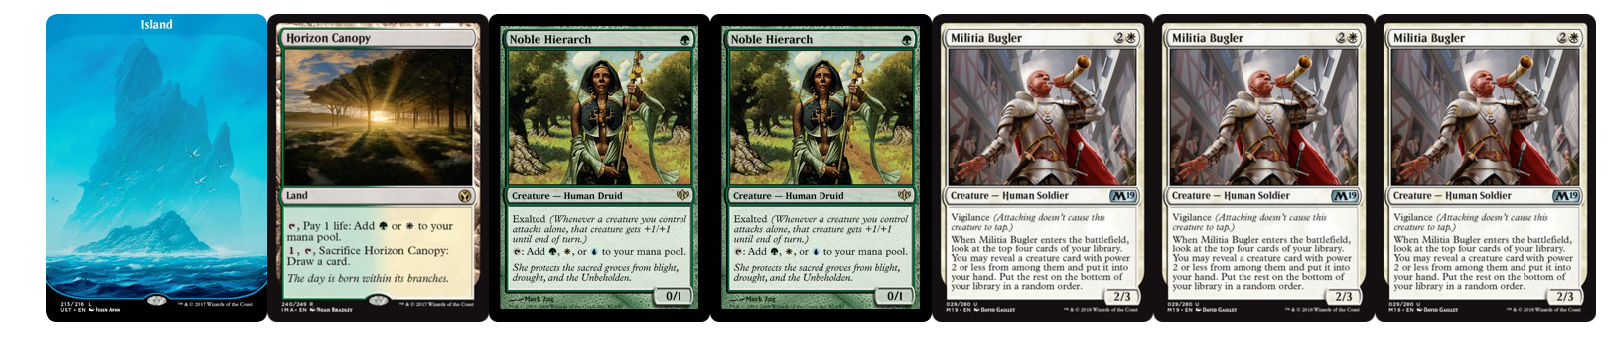

-------------------------------------------------------KEEP------------------------------------------------------- 







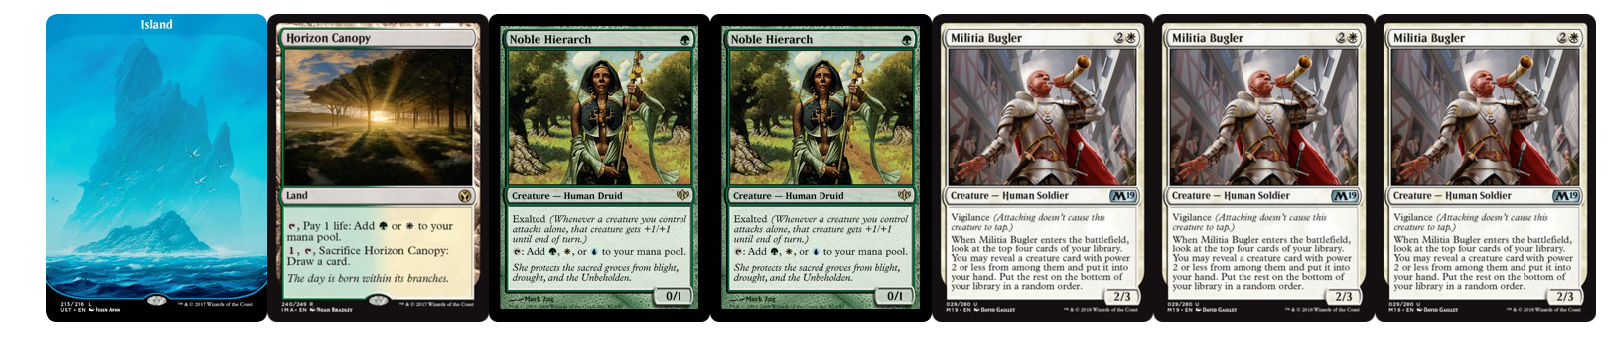

-------------------------------------------------------MULL------------------------------------------------------- 







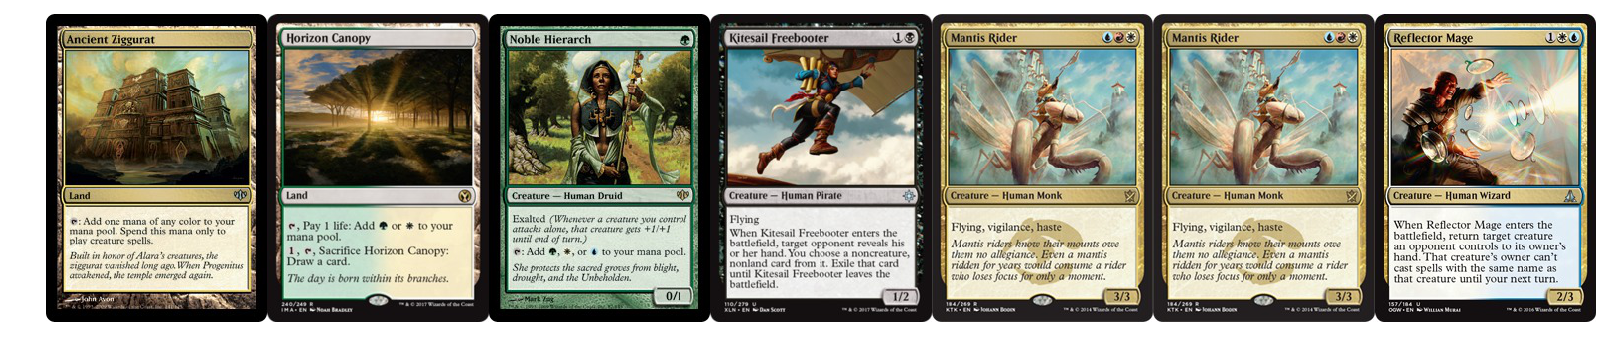

-------------------------------------------------------KEEP------------------------------------------------------- 







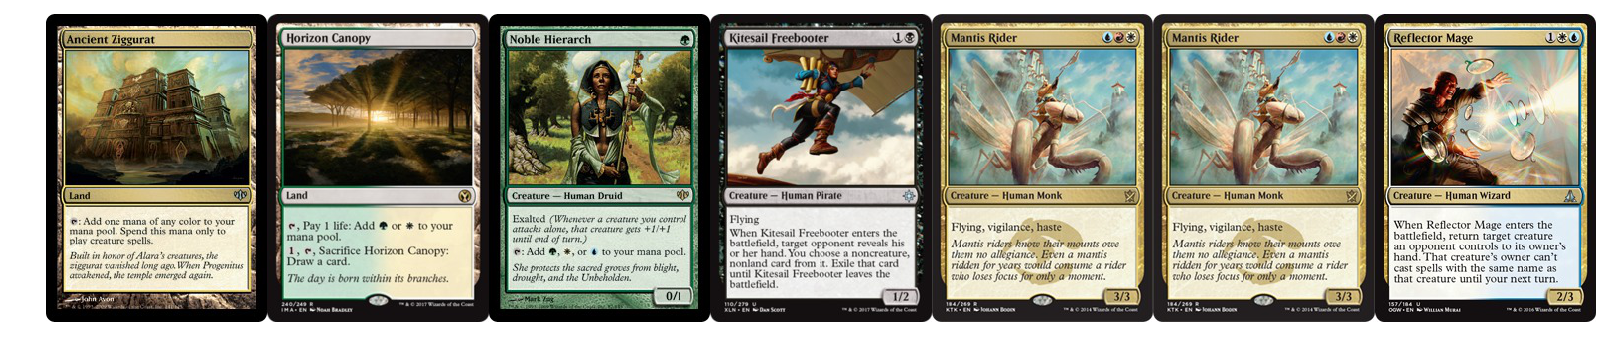

-------------------------------------------------------MULL------------------------------------------------------- 







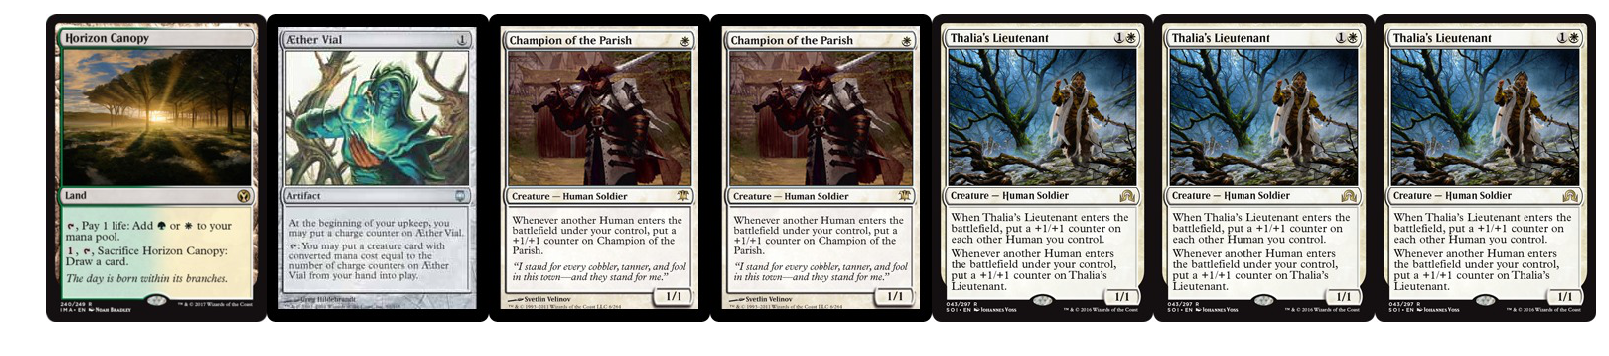

-------------------------------------------------------KEEP------------------------------------------------------- 







In [7]:
card_list = ["island","plains","seachrome_coast","unclaimed_territory","ancient_ziggurat","cavern_of_souls",
            "horizon_canopy","aether_vial","noble_hierarch","champion_of_the_parish","kitesail_freebooter",
            "meddling_mage","phantasmal_image","thalia_guardian_of_thraben","thalia_lieutenant","mantis_rider",
            "militia_bugler","reflector_mage"]

hand = ['island horizon_canopy noble_hierarch noble_hierarch militia_bugler militia_bugler militia_bugler']
Run_a_hand(hand,model_magic_RFC)
Run_a_hand_DL(hand,model)
hand = ['island horizon_canopy noble_hierarch noble_hierarch mantis_rider mantis_rider mantis_rider']
hand = ['ancient_ziggurat horizon_canopy noble_hierarch reflector_mage mantis_rider mantis_rider kitesail_freebooter']
Run_a_hand(hand,model_magic_RFC)
Run_a_hand_DL(hand,model)

hand = ['horizon_canopy aether_vial champion_of_the_parish thalia_lieutenant thalia_lieutenant thalia_lieutenant champion_of_the_parish']
Run_a_hand(hand,model_magic_RFC)

In [6]:
#Test_model(deck_dict,10,model_magic_RFC)

print(X_test[0].shape)

(126,)


In [6]:
def Test_a_testable_hand_2(testable_hand,model_RFC): 
    testable_hand_RFC = testable_hand_for_RFC(testable_hand)
    if model_RFC.predict(testable_hand_RFC)[0] ==1:
        print('-------------------------------------------------------KEEP-------------------------------------------------------','\n')
        print('\n')
    else :
        print('-------------------------------------------------------MULL-------------------------------------------------------','\n')
        print('\n')
    return model_RFC.predict(testable_hand_RFC)[0]    
    
def training_set_with_model(deck_dict,model_RFC,n,n_lands,training_set_size,training_file_name):
    pv =';'
    with open(training_file_name+'_model.csv' , 'w') as training_file,\
    open(training_file_name+'_model_question.csv' , 'w') as question_file:
        #deck_list = decklist(deck_dict)
        deck_list_lands = decklist(lands_dict)
        deck_list_non_land = decklist(non_land_dict)
        for i in range(training_set_size):
            #current_hand = create_hand(deck_list,n)
            current_hand_lands = create_hand(deck_list_lands,n_lands)
            current_hand_non_land = create_hand(deck_list_non_land,n-n_lands)
            current_hand = current_hand_lands+current_hand_non_land
            
            sorted_hand = sort_hand(current_hand,card_list)
            testable_hand = created_hand_to_testable_hand(sorted_hand)
            show_hand(testable_hand) 
            prediction = Test_a_testable_hand_2(testable_hand,model_RFC)         
            y = int(input("Correct: 1, Not_correct: 0 or Not sure: 3 ?"))
            line_written=''
            for card in sorted_hand:
                line_written += card+pv
            if y==1:
                prediction=str(prediction)
                line_written += prediction + '\n'
                training_file.write(line_written)
            if y==0:
                prediction=str(1-prediction)
                line_written += prediction + '\n'
                training_file.write(line_written)
            if y==3:
                y=str(y)
                line_written += y + '\n'
                question_file.write(line_written)
            if y==9:
                break 
    print('Written !')
    
def Test_a_testable_hand_DL(testable_hand,model_ML): 
    testable_hand_DL = testable_hand_for_RFC(testable_hand)[0]
    testable_hand_DL = np.expand_dims(testable_hand_DL,axis=0)
    prediction = model_ML.predict(testable_hand_DL)[0,0]
    if  prediction==1:
        print('-------------------------------------------------------KEEP-------------------------------------------------------','\n')
        print('\n')
        print('\n')
    else :
        print('-------------------------------------------------------MULL-------------------------------------------------------','\n')
        print('\n')
        print('\n')

def Run_a_hand_DL(hand,model_RFC):
    sorted_hand = sort_hand(hand[0].split(),card_list)
    testable_hand = created_hand_to_testable_hand(sorted_hand)
    show_hand(testable_hand)
    Test_a_testable_hand_DL(testable_hand,model_RFC)

In [4]:
#training_set_with_model(deck_dict,model_magic_RFC,7,2,100,'Training_set_humans/training_set_')

In [77]:
from sklearn.cluster import KMeans
X = features_raw
print(X.shape)

Cluster_0 = []
Cluster_1 = []
Cluster_2 = []
Cluster_3 = []
Cluster_4 = []
Cluster_5 = []

kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(X)
for i in range(len(kmeans)):
    if kmeans[i]==0:
        Cluster_0.append(card_list[i])
    if kmeans[i]==1:
        Cluster_1.append(card_list[i])
    if kmeans[i]==2:
        Cluster_2.append(card_list[i])
    if kmeans[i]==3:
        Cluster_3.append(card_list[i])
    if kmeans[i]==4:
        Cluster_4.append(card_list[i])
    if kmeans[i]==5:
        Cluster_5.append(card_list[i])
    #print(kmeans[i])
    #print(card_list[i],'\n')

(18, 18)


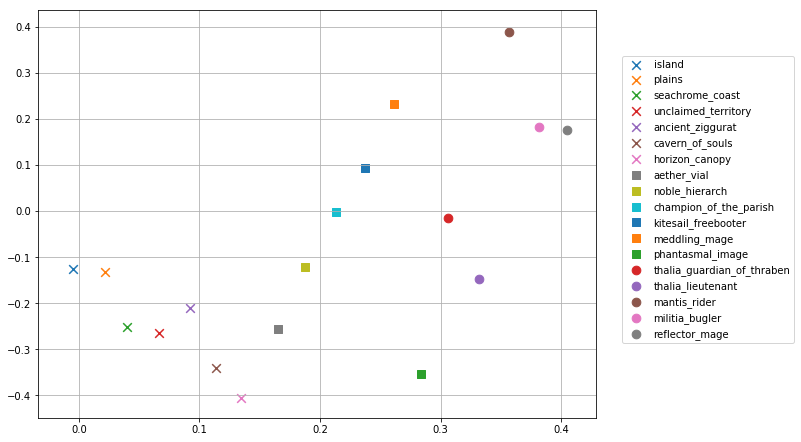

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(np.transpose(X))
x = pca.components_[0,:]
y = pca.components_[1,:]



fig, ax = plt.subplots(figsize=(10,7.5))
for i in range(len(kmeans)):
    name_of_the_card = card_list[i]
    if name_of_the_card in Cluster_0 :
        ax.scatter(x[i], y[i],s=75, marker='x',label=name_of_the_card)
    if name_of_the_card in Cluster_1 :
        ax.scatter(x[i], y[i],s=75, marker='o',label=name_of_the_card)
    if name_of_the_card in Cluster_2 :
        ax.scatter(x[i], y[i],s=75, marker='s',label=name_of_the_card)
    if name_of_the_card in Cluster_3 :
        ax.scatter(x[i], y[i],s=75, marker='*',label=name_of_the_card)
    if name_of_the_card in Cluster_4 :
        ax.scatter(x[i], y[i],s=75, marker='+',label=name_of_the_card)
    if name_of_the_card in Cluster_5 :
        ax.scatter(x[i], y[i],s=75, marker='^',label=name_of_the_card)
ax.legend(loc=9, bbox_to_anchor=(1.2,0.9))
ax.grid(True)
#plt.figure(figsize=(200, 160), dpi= 200, facecolor='w', edgecolor='k')
#plt.show()
